# Capstone: Computer vision foundation

# National ID Card Recognition

# Define Project Objectives

In this Capstone project, 

you will be working on `National ID Card Recognition using OCR`. 

You will use `Tesseract OCR`, an open-source OCR engine, to `recognize the text` on the ID card images. 

Additionally, you will `use OpenCV`, an open-source computer vision library, to `preprocess the images` before passing them to the OCR engine. 

This project will give you hands-on experience with computer vision and OCR, which are increasingly important areas in the field of artificial intelligence.

Hint: `Use Tesseract for OCR` and `Find Contours to wrap the image`.

Target: Make this `code generic` enough and upload sample images to test it.

Expected : upload random national id card , 

output :all `data in structured pandas format`.

In [16]:
from PIL import Image
import pytesseract
import os
import pandas as pd

Set the Tesseract data directory

In [17]:
os.environ["TESSDATA_PREFIX"] = "C:/Program Files/Tesseract-OCR/tessdata"

In [18]:
def process_image(img_pro):
    tessdata_dir_config = f'--tessdata-dir "{os.environ["TESSDATA_PREFIX"]}"'
    
    text = pytesseract.image_to_string(img_pro, lang='ind', config=tessdata_dir_config)

    sections = {}
    lines = text.split('\n')
    current_section = ''

    i = 1
    for line in lines:
        if line.strip() == "":
            continue

        if "Name" in line:
            current_section = "section_3"

        elif "Code" in line:
            current_section = "section_6"

        else:
            current_section = f"section_{i}"

        sections[current_section] = line.strip()
        i += 1

    print(sections)
    university = sections.get('section_1', '')
    faculty = sections.get('section_2', '')
    name = sections.get('section_3', '')[7:] + ' ' + sections.get('section_4', '') + ' ' + sections.get('section_5', '')
    id_value = sections.get('section_6', '')[6:]

    return name, university, faculty, id_value 

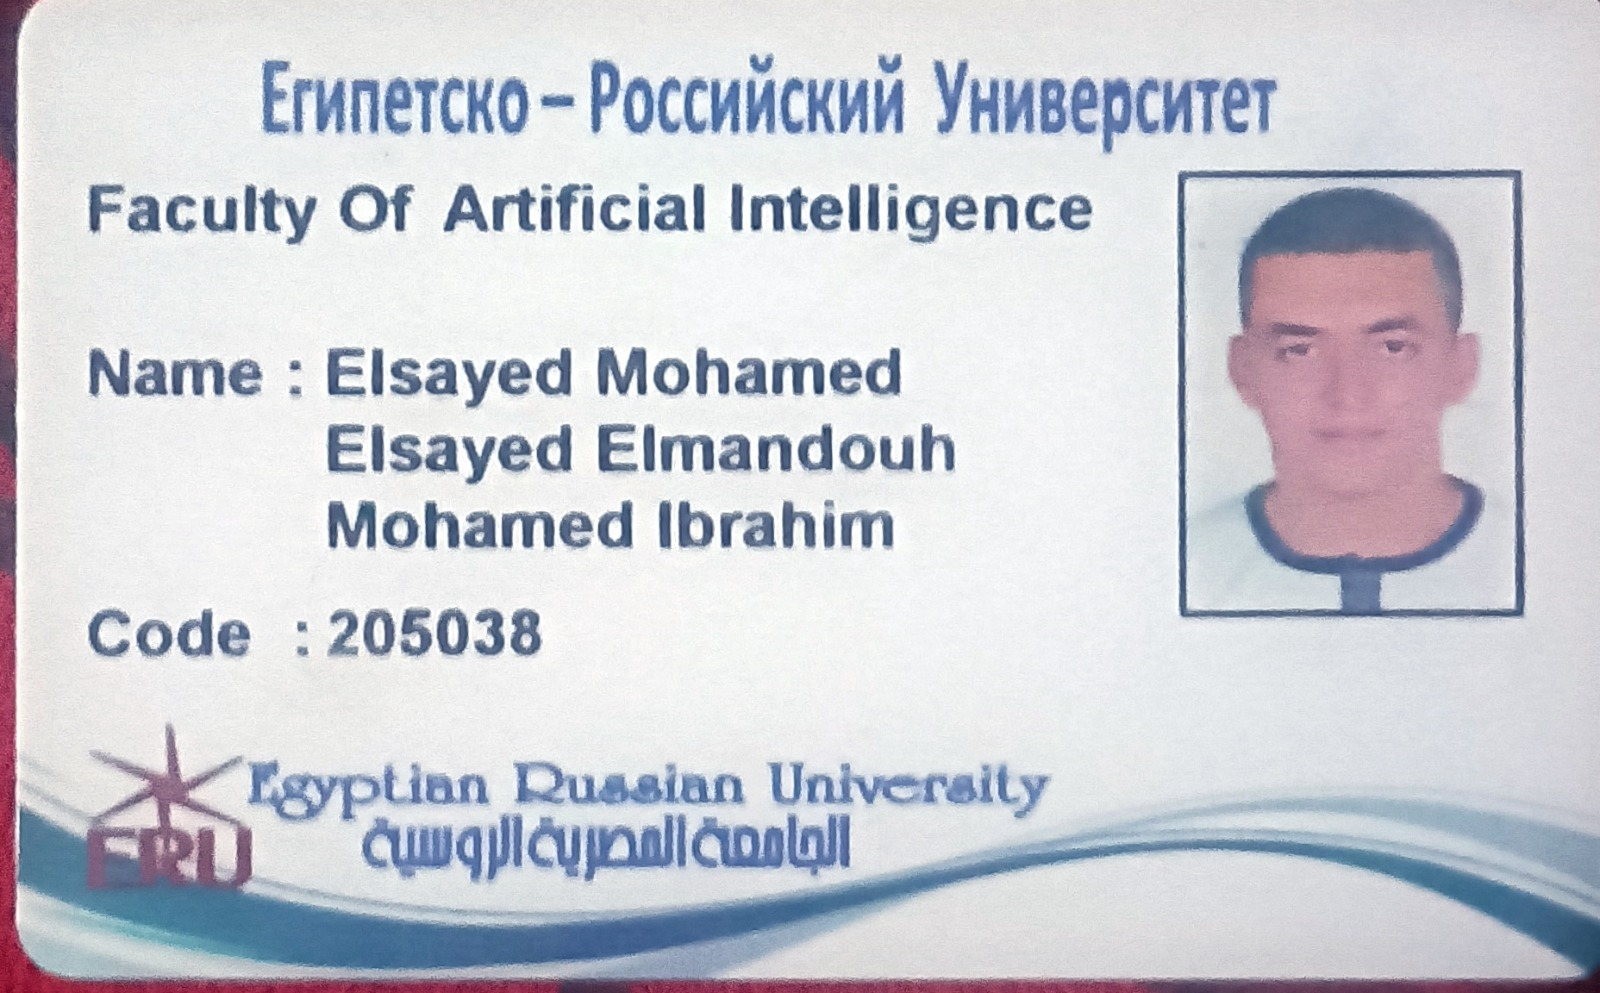

In [20]:
image_path = "ID_ERU.jpeg"
img_pro = Image.open(image_path)
img_pro

In [25]:
name, university, faculty, id_value = process_image(img_pro)

{'section_1': 'Erunetrcxo - PoccuncKun YHuBepcuteT', 'section_2': 'Faculty Of Artificial Intelligence', 'section_3': 'Name : Elsayed Mohamed', 'section_4': 'Elsayed Elmandouh', 'section_5': 'Mohamed Ibrahim', 'section_6': 'Code :205038', 'section_7': 'niversiLy', 'section_8': "'E?pcumqulcummm m—I", 'section_9': 'L—:… aa A'}


In [26]:
name

'Elsayed Mohamed Elsayed Elmandouh Mohamed Ibrahim'

In [22]:
university

'Erunetrcxo - PoccuncKun YHuBepcuteT'

In [23]:
faculty

'Faculty Of Artificial Intelligence'

In [24]:
id_value

'205038'

In [27]:
data = {
    "Name": [name],
    "University": [university],
    "Faculty": [faculty],
    "ID": [id_value]
}
df = pd.DataFrame(data)
df

,Name,University,Faculty,ID
0,Elsayed Mohamed Elsayed Elmandouh Mohamed Ibrahim,Erunetrcxo - PoccuncKun YHuBepcuteT,Faculty Of Artificial Intelligence,205038
